# Task 1

In [47]:
#open the dataset, ignore errors as it cant be decoded
with open(r'C:\Users\user\Desktop\NLP\reviews_data.txt',encoding="utf-8",errors="ignore") as f:
    data1 = f.read()
with open(r'C:\Users\user\Desktop\NLP\capital.txt',encoding="utf-8",errors="ignore") as f:
    data2 = f.read()

In [48]:
#Try reading only 2000 characters
data=data2

In [49]:
#Tokenization
from nltk.tokenize import word_tokenize  
from nltk.tokenize import RegexpTokenizer
tokens = data.lower()  #convert to lowercase
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(tokens) #tokenize and remove punctuation
#sample doc1 tokenized
print(tokens[0:100])

['officials', 'federal', 'capital', 'territory', 'administration', 'fc', 'ta', 'em', 'barked', 'community', 'community', 'search', 'active', 'cases', 'corona', 'virus', 'across', 'capital', 'city', 'officials', 'federal', 'capital', 'territory', 'administration', 'fc', 'ta', 'em', 'barked', 'community', 'community', 'search', 'active', 'cases', 'corona', 'virus', 'across', 'capital', 'city', 'failure', 'diamond', 'city', 'national', 'economic', 'capital', 'satisfying', 'people', 'keeping', 'well', 'condition', 'ah', 'speak', 'english', 'deffo', 'capital', 'city', 'provocation', 'vancouver', 'im', 'city', 'govts', 'unlock', 'alot', 'capital', 'changing', 'zoning', 'city', 'state', 'responsive', 'first', 'inevitably', 'either', 'becomes', 'capital', 'empire', 'absorbed', 'another', 'empire', 'anti', 'democratic', 'outcomes', 'making', 'democracies', 'city', 'states', 'ep', 'al', 'tri', 'tuesday', 'old', 'capitol', 'museum', 'know', 'city', 'mississippi', 'catfish', 'capital', 'reply', 'k

In [50]:
#Remove stopwords,lemmatize
from nltk.corpus import stopwords
import re, string
def preprocess(list):
    l=[]
    for word in list:
        if word not in set(stopwords.words("english")) and len(word)>2:
            lem = WordNetLemmatizer()
            word=lem.lemmatize(word)
            word=re.sub(r"\d+","",word)
            word=word.strip()
            l.append(word)
        else:
            pass
    return l

In [51]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
clean= preprocess(tokens)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [52]:
#sample of preprocessed data
print(clean[0:100])

['official', 'federal', 'capital', 'territory', 'administration', 'barked', 'community', 'community', 'search', 'active', 'case', 'corona', 'virus', 'across', 'capital', 'city', 'official', 'federal', 'capital', 'territory', 'administration', 'barked', 'community', 'community', 'search', 'active', 'case', 'corona', 'virus', 'across', 'capital', 'city', 'failure', 'diamond', 'city', 'national', 'economic', 'capital', 'satisfying', 'people', 'keeping', 'well', 'condition', 'speak', 'english', 'deffo', 'capital', 'city', 'provocation', 'vancouver', 'city', 'govts', 'unlock', 'alot', 'capital', 'changing', 'zoning', 'city', 'state', 'responsive', 'first', 'inevitably', 'either', 'becomes', 'capital', 'empire', 'absorbed', 'another', 'empire', 'anti', 'democratic', 'outcome', 'making', 'democracy', 'city', 'state', 'tri', 'tuesday', 'old', 'capitol', 'museum', 'know', 'city', 'mississippi', 'catfish', 'capital', 'reply', 'know', 'provocation', 'vancouver', 'city', 'govts', 'unlock', 'alot',

In [53]:
#Create word2vec model
import gensim
import multiprocessing
from gensim import models
from gensim.models import Word2Vec
cores = multiprocessing.cpu_count()
w2v_model = Word2Vec(min_count=1,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)
w2v_model.build_vocab([clean], progress_per=10000)
w2v_model.train([clean], total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

#Find similar words
w2v_model.most_similar(positive=["one","gift"], negative=["two"],topn=5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


[('gujarat', 0.9993873834609985),
 ('permanently', 0.9991863965988159),
 ('shift', 0.9988374710083008),
 ('maybe', 0.9987260103225708),
 ('right', 0.9986821413040161)]

In [54]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in w2v_model.wv.vocab:
        tokens.append(w2v_model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


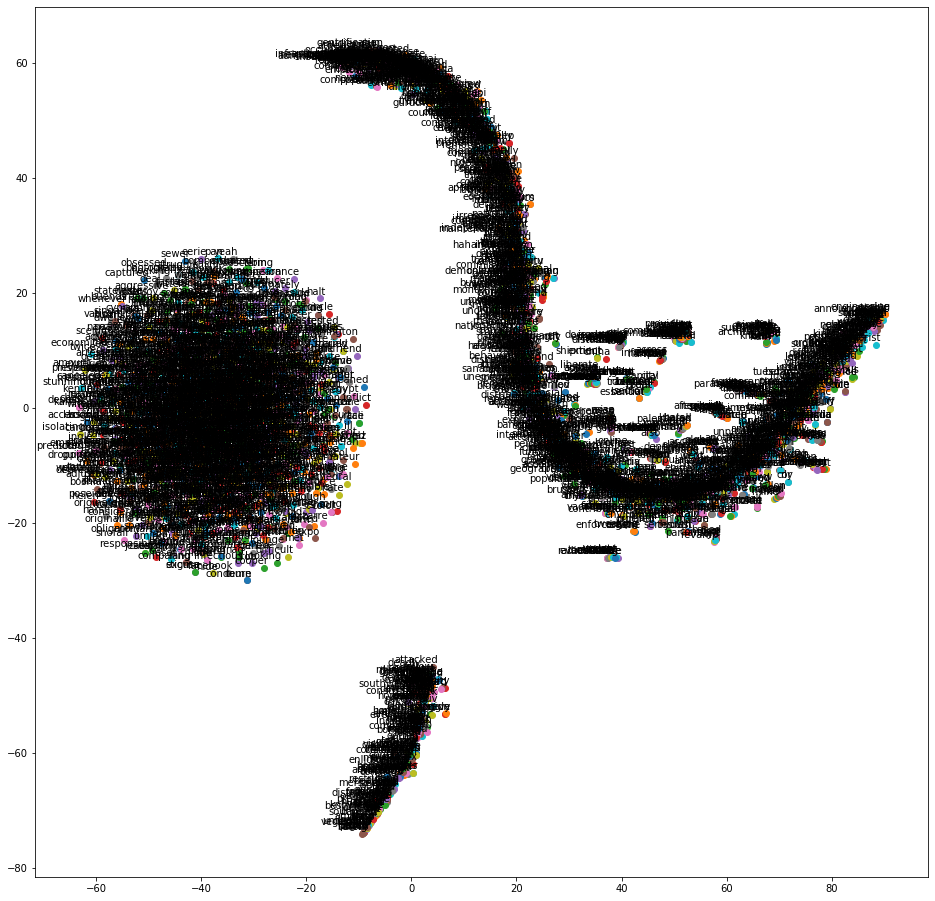

In [55]:
tsne_plot(w2v_model)

# Task 2

## K-means

In [64]:
from nltk.cluster import KMeansClusterer
import nltk
input = w2v_model.wv[w2v_model.wv.vocab]
NUM_CLUSTERS=3
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(input, assign_clusters=True)

In [57]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(input)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(input))
 
silhouette_score = metrics.silhouette_score(input, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-361.88617
Silhouette_score: 
0.6921918


In [58]:
from sklearn import cluster
from sklearn import metrics
import numpy as np
k = np.linspace(2,10,10,dtype=int)
score = []
sil_score =[]
centroids = kmeans.cluster_centers_
for i in k:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(input)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    print("Kmeans score: ",kmeans.score(input))
    silhouette_score = metrics.silhouette_score(input, labels, metric='euclidean')
    sil_score.append(silhouette_score)
    print ("Silhouette_score: ",silhouette_score)

Kmeans score:  -595.79407
Silhouette_score:  0.8735348
Kmeans score:  -595.79407
Silhouette_score:  0.8735348
Kmeans score:  -361.8858
Silhouette_score:  0.6920847
Kmeans score:  -298.70956
Silhouette_score:  0.7011479
Kmeans score:  -238.76694
Silhouette_score:  0.6623788
Kmeans score:  -188.9734
Silhouette_score:  0.6723524
Kmeans score:  -156.23582
Silhouette_score:  0.682346
Kmeans score:  -130.18219
Silhouette_score:  0.6654792
Kmeans score:  -113.08412
Silhouette_score:  0.6591758
Kmeans score:  -103.29993
Silhouette_score:  0.6479338


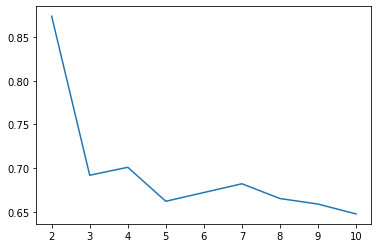

In [59]:
plt.plot(k,sil_score)

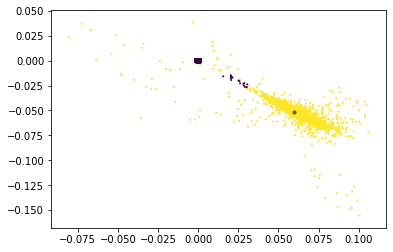

In [60]:
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(input)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
y_kmeans = kmeans.predict(input)
plt.scatter(input[:, 0], input[:, 1], c=y_kmeans, s=1, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=10, alpha=0.5);

## Heirachy Agglomerative Clustering

###  method =[complete, average,ward's], metrics =[Euclidean,mahattan,cosine]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  after removing the cwd from sys.path.


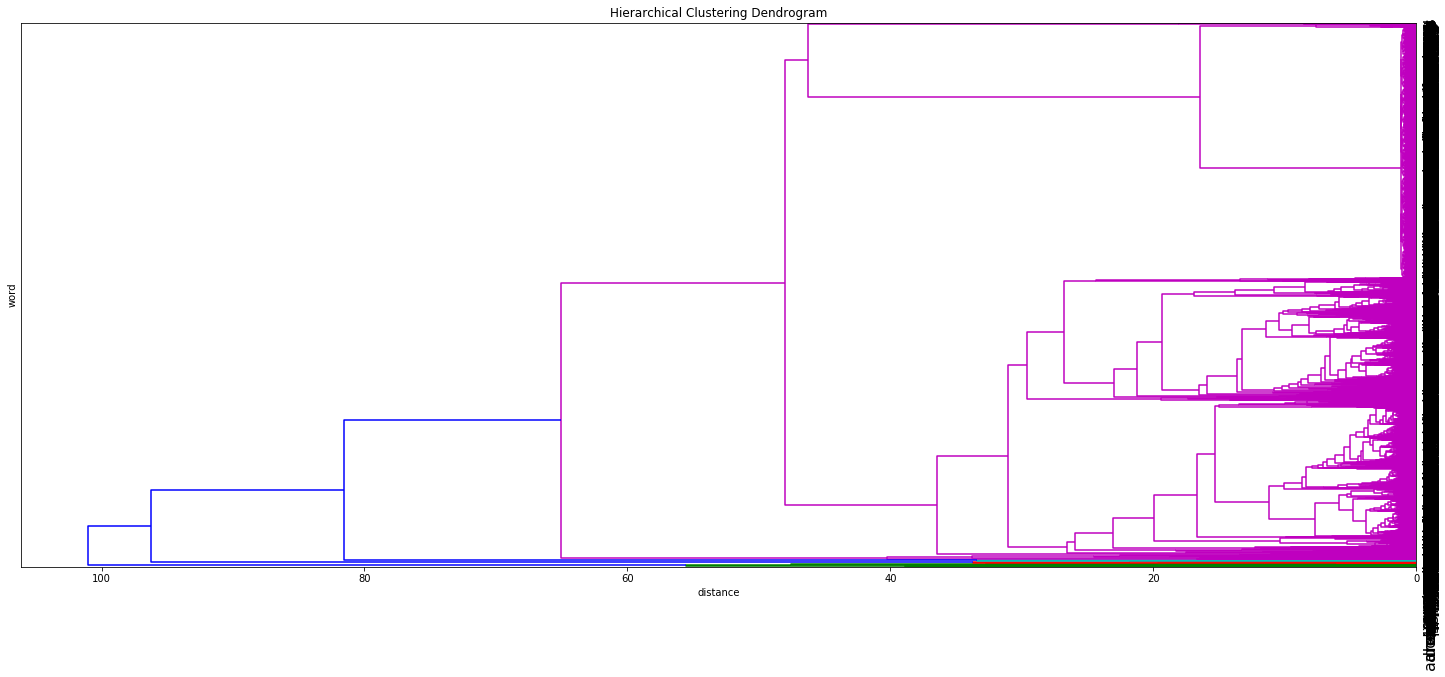

In [61]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

l = linkage(w2v_model.wv.syn0, method='complete', metric='seuclidean')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('word')
plt.xlabel('distance')

dendrogram(
    l,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=16.,  # font size for the x axis labels
    orientation='left',
    leaf_label_func=lambda v: str(w2v_model.wv.index2word[v])
)
plt.show()

Text(0.5, 1.0, 'Clusters using hierarchical method')

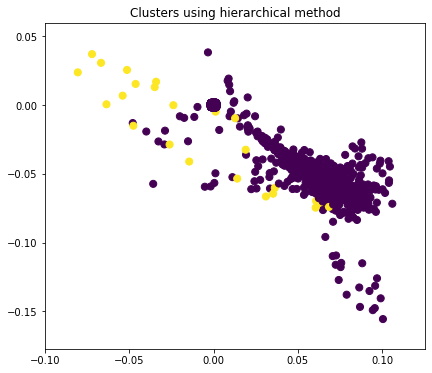

In [62]:
#This one uses sklearn
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=2, affinity='seuclidean', linkage='complete')

y_hc = hc.fit_predict(input)
fig = plt.figure(figsize=(15,6))
plt.subplot(121)
plt.scatter(input[:, 0], input[:, 1], c=y_hc, s=50, cmap='viridis')
plt.title('Clusters using hierarchical method')

In [63]:
with open(r'C:\Users\user\Desktop\NLP\capital.txt',encoding="utf-8",errors="ignore") as f:
    data = f.read()